# Imports and display options

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import plotly.graph_objects as go
from plotly.validators.scatter.marker import SymbolValidator
from sklearn.model_selection import train_test_split

tf.compat.v1.disable_eager_execution()

os.chdir(os.path.join(os.path.split(os.getcwd())[0]))

from MND import MultivariateNormalDistributionModel

pd.set_option("display.max_columns", None)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

# Functions

In [2]:
def plot_unique_counts(data, title=''):
    (unique, counts) = np.unique(np.asarray(data, dtype=np.str_), return_counts=True)
    sort_arr = np.argsort(counts)[::-1]
    unique = unique[sort_arr]
    counts = counts[sort_arr]
    
    plt.bar(unique, counts)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Data loading

In [3]:
df = pd.read_csv('oscp_4-0_v2_4_intervals.csv')
df

,SessionId,BrowswerFamily,Reffer,Country,DefaultHeight,DefaultWidth,DeviceType,SessionDurationTime,SessionEngagementTime,sesStartTimestamp,NoOfEvents,NoOfClicks,NoOfPageLoads,interval_1,interval_2,interval_3,interval_4
0,00020a70-01a8-11ec-b771-0f5dedc2814c,CHROME,https://www.solitalian.it/,Italy,720,1280,DESKTOP,10.075,10.000,1629458161454,1.0,0.0,1.0,0.500000,0.000000,0.0,0.500000
1,00051250-ce50-11eb-9f3e-355d224174c8,CHROME,https://googleads.g.doubleclick.net/,Poland,740,360,MOBILE,10.110,10.000,1623812857072,1.0,0.0,1.0,0.500000,0.000000,0.0,0.500000
2,001cf190-047e-11ec-8ad2-87937df837b9,OTHER,https://www.cargurus.com/Cars/inventorylisting...,United States,1200,340,OTHER,10.439,10.320,1629769976953,2.0,0.0,2.0,0.666667,0.000000,0.0,0.333333
3,003b40e0-042f-11ec-942e-ef735f84a5a1,OTHER,NaN,United States,600,800,OTHER,13.149,12.983,1629736046319,1.0,0.0,1.0,0.500000,0.000000,0.0,0.500000
4,004985a0-01a6-11ec-9d8e-7df8c569842b,CHROME,NaN,Turkey,915,412,MOBILE,88.574,11.028,1629457302133,2.0,1.0,1.0,0.666667,0.000000,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5574,ffd20f50-cdea-11eb-a0b4-31cc28dffcc1,CHROME,NaN,Poland,720,1280,DESKTOP,25.172,21.943,1623769476100,3.0,2.0,1.0,0.250000,0.500000,0.0,0.250000
5575,ffe81580-cff1-11eb-9228-835fda514e98,OTHER,NaN,Italy,667,375,MOBILE,12.127,12.075,1623992385641,1.0,0.0,1.0,0.500000,0.000000,0.0,0.500000
5576,ffed2120-d2bb-11eb-bc4e-5129960af9bb,CHROME,NaN,Italy,962,601,MOBILE,11.315,10.000,1624299266352,1.0,0.0,1.0,0.500000,0.000000,0.0,0.500000
5577,fffa8d20-ca40-11eb-8df4-2940124b3e6a,CHROME,https://www.google.com/,Chile,768,1366,DESKTOP,371.892,52.411,1623366608922,8.0,3.0,5.0,0.111111,0.777778,0.0,0.111111


In [4]:
feature_columns = ['SessionDurationTime', 'SessionEngagementTime', 'NoOfEvents', 'NoOfClicks', 'NoOfPageLoads',
                   'BrowswerFamily', 'DeviceType']

# Visualization of categorical data

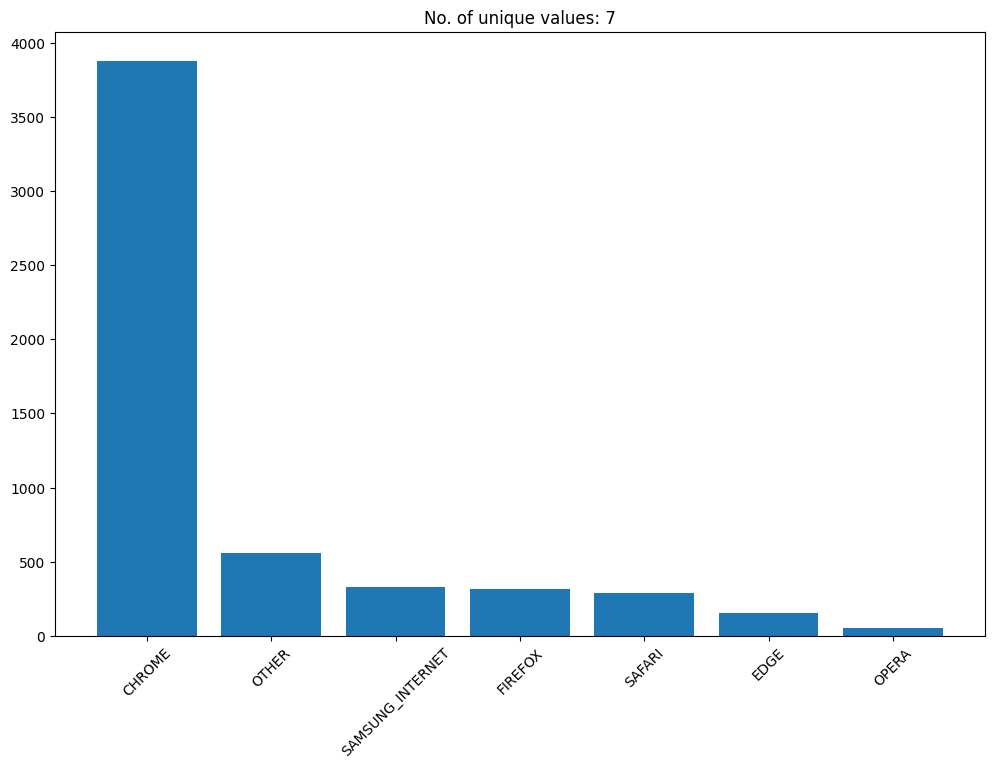

In [5]:
plot_data = df['BrowswerFamily'].values
plot_unique_counts(plot_data, title=f'No. of unique values: {len(np.unique(np.asarray(plot_data, dtype=np.str_)))}')

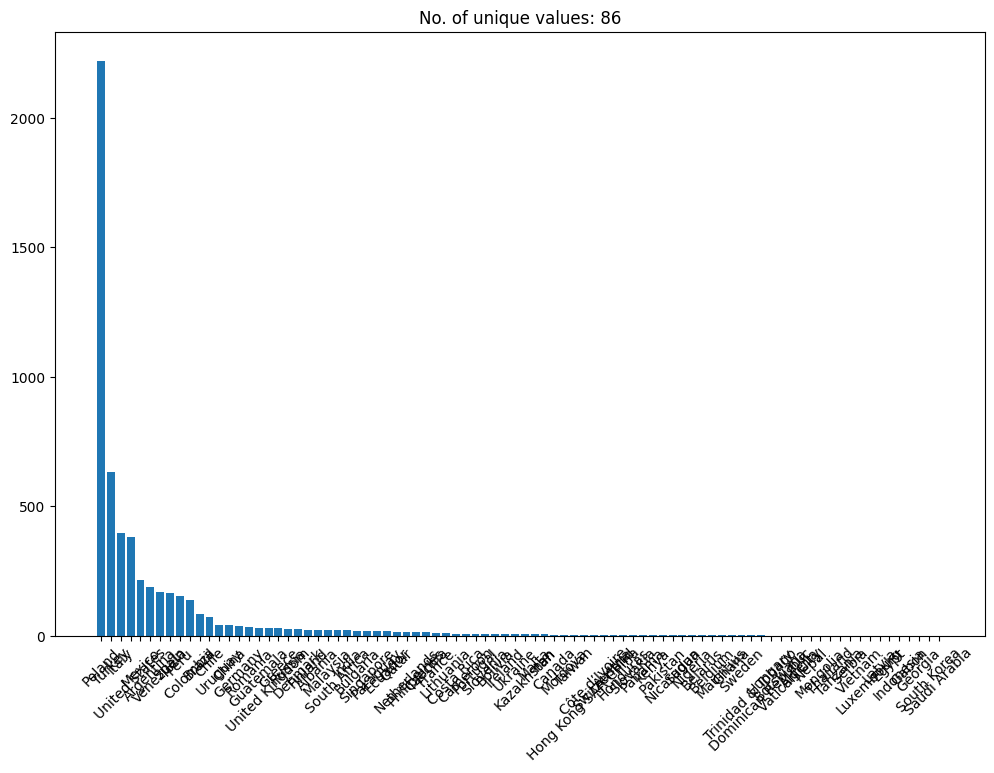

In [6]:
plot_data = df['Country'].values
plot_unique_counts(plot_data, title=f'No. of unique values: {len(np.unique(np.asarray(plot_data, dtype=np.str_)))}')

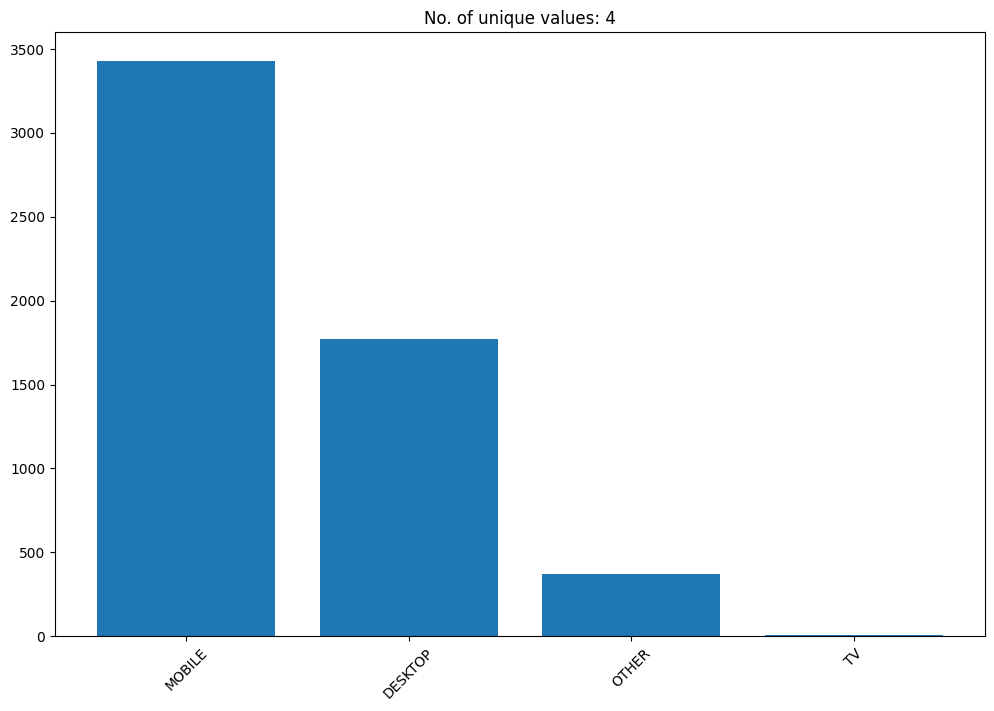

In [7]:
plot_data = df['DeviceType'].values
plot_unique_counts(plot_data, title=f'No. of unique values: {len(np.unique(np.asarray(plot_data, dtype=np.str_)))}')

# Preprocessing

## Visualization of numercial data

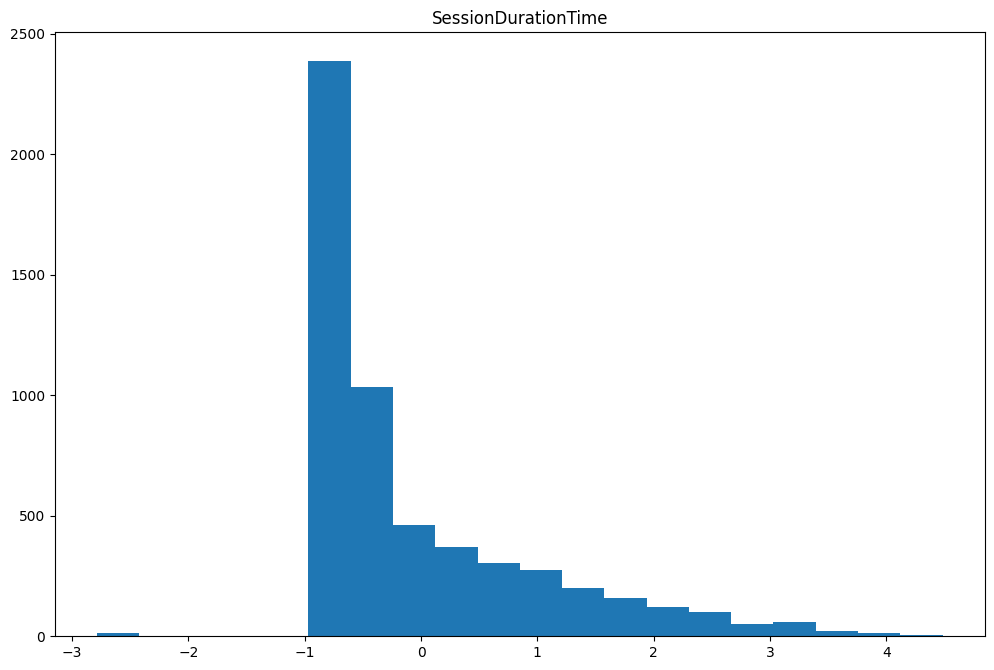

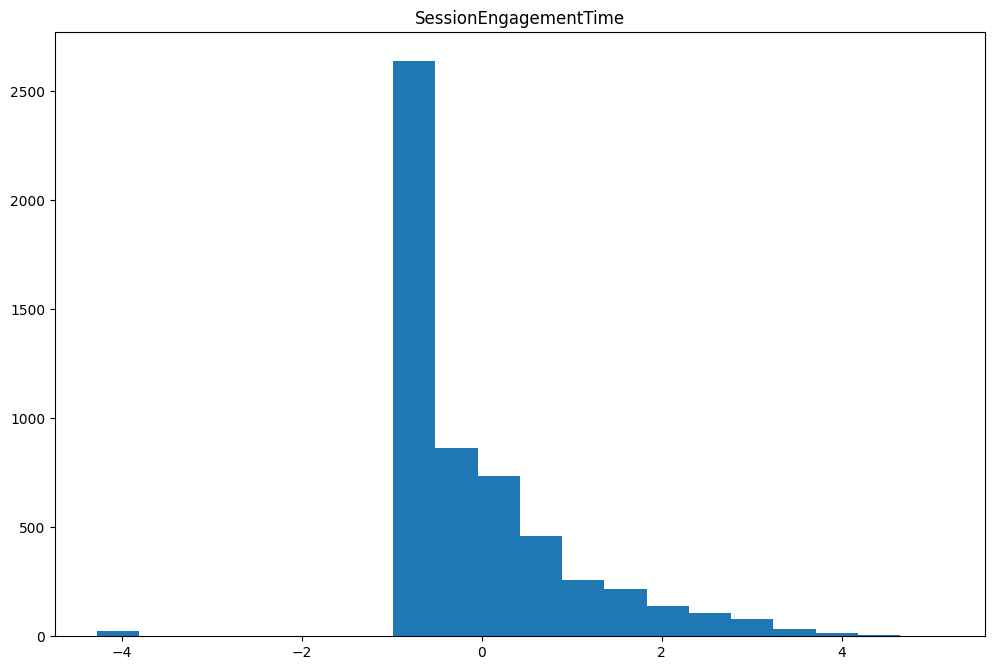

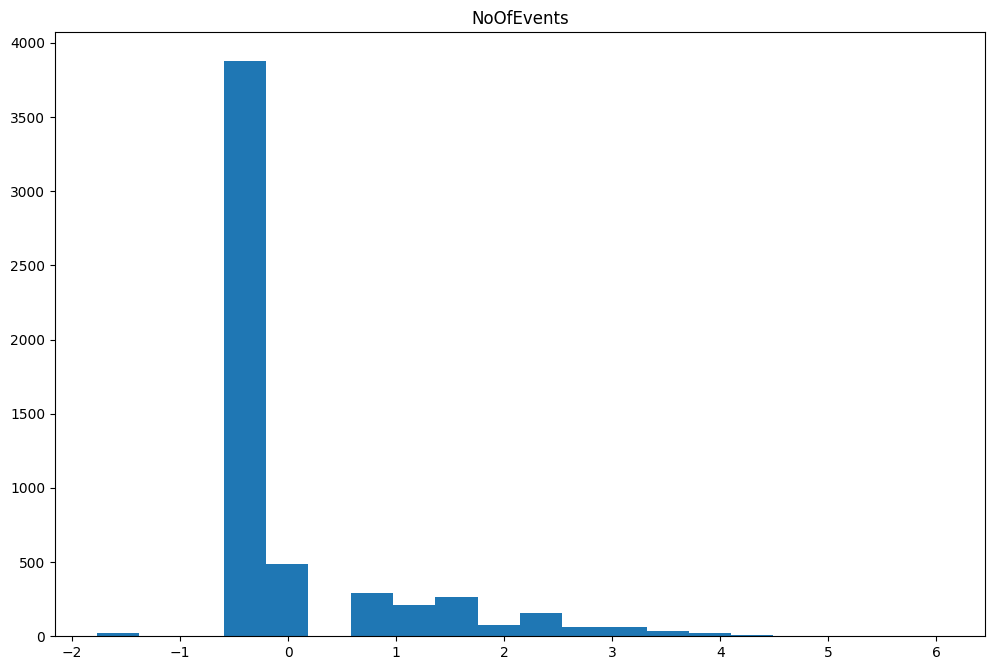

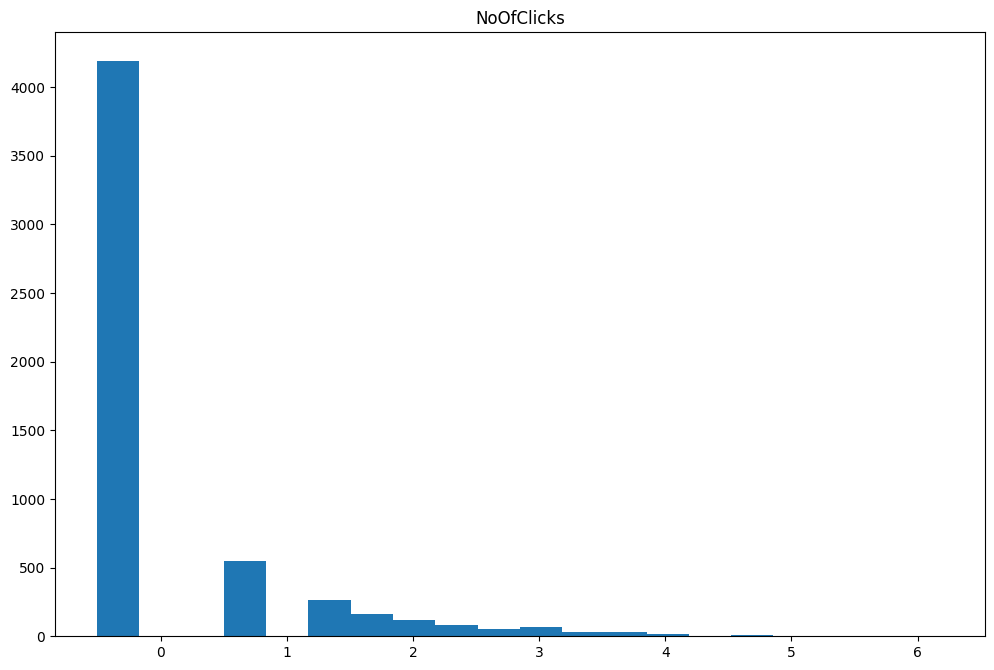

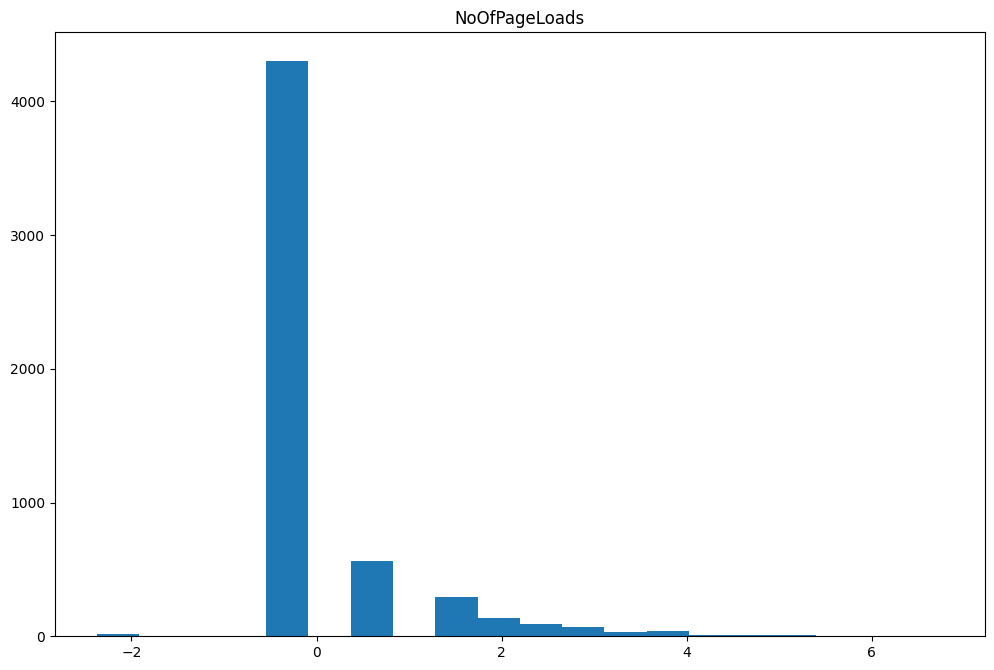

In [8]:
for i, feature in enumerate(feature_columns[:-2]):
    data = np.log1p(df[feature].values)
    mean, std = np.mean(data), np.std(data)
    data = (data - mean) / std
    plt.hist(data, bins=20)
    plt.title(feature)
    plt.show()

In [9]:
X_1 = df[feature_columns[:-2]].values

for i, feature in enumerate(feature_columns[:-2]):
    data = np.log1p(X_1[:, i])
    mean, std = np.mean(data), np.std(data)
    data -= mean
    data /= std
    X_1[:, i] = data

In [10]:
X_2 = df[feature_columns[-2:]].values

for i, feature in enumerate(feature_columns[-2:]):
    OneHot = OneHotEncoder(sparse=False)
    OneHot.fit(X_2[:, i].reshape((-1, 1)))
    onehot = OneHot.transform(X_2[:, i].reshape((-1, 1)))
    
    if i == 0:
        append_data = onehot
        names = OneHot.get_feature_names()
    else:
        append_data = np.hstack((append_data, onehot))
        names = np.append(names, OneHot.get_feature_names())

names = np.vectorize(lambda x: x[3:])(names)
append_data

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [11]:
append_data.shape

(5579, 11)

In [12]:
X = np.hstack((X_1, append_data))
X

array([[-0.70355808, -0.66609064, -0.53268533, ...,  0.        ,
         0.        ,  0.        ],
       [-0.70082705, -0.66609064, -0.53268533, ...,  1.        ,
         0.        ,  0.        ],
       [-0.67556804, -0.62291797,  0.18927453, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.61170033, -0.66609064, -0.53268533, ...,  1.        ,
         0.        ,  0.        ],
       [ 2.34019768,  1.71285147,  2.14543292, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.67272948, -0.16460919, -0.53268533, ...,  0.        ,
         0.        ,  0.        ]])

In [13]:
X.shape

(5579, 16)

In [14]:
n_features = X.shape[1]

# Model creation

In [15]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.keras.backend.random_normal(shape=(2, ),
                                            mean=0., stddev=1.)
    return z_mean + tf.keras.backend.exp(z_log_var) * epsilon

In [16]:
class standardized_loss_layer(tf.keras.layers.Layer):
    
    def vae_std_loss(self, x, x_pred):
        xent_loss = tf.keras.metrics.mae(x, x_pred)
        kl_loss = -5e-4 * tf.keras.backend.mean(1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var), axis=-1)
        # return tf.keras.backend.mean(xent_loss + kl_loss) / 2
        loss = (xent_loss + kl_loss) / 2
        loss = tf.keras.backend.reshape(loss, (-1, 1))
        return loss
    
    def call(self,  inputs):
        x = inputs[0]
        z_decoded = inputs[1]
        loss = self.vae_std_loss(x, z_decoded)
        # self.add_loss(loss, inputs=inputs)
        return loss

class one_hot_loss_layer(tf.keras.layers.Layer):
    
    def vae_one_hot_loss(self, x, x_pred):
        xent_loss = tf.keras.metrics.binary_crossentropy(x, x_pred)
        kl_loss = -5e-4 * tf.keras.backend.mean(1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var), axis=-1)
        # return tf.keras.backend.mean(xent_loss + kl_loss) / 2
        loss = (xent_loss + kl_loss) / 2
        loss = tf.keras.backend.reshape(loss, (-1, 1))
        return loss

    
    def call(self,  inputs):
        x = inputs[0]
        z_decoded = inputs[1]
        loss = self.vae_one_hot_loss(x, z_decoded)
        # self.add_loss(loss, inputs=inputs)
        return loss

class sum_loss_layer(tf.keras.layers.Layer):
    
    def call(self, inputs):
        std_loss, one_hot_loss = inputs
        loss = tf.keras.backend.sum(std_loss, one_hot_loss)
        self.add_loss(loss)
        return std_loss

class total_loss_layer(tf.keras.layers.Layer):
    
    def vae_std_loss(self, x, x_pred):
        xent_loss = tf.keras.metrics.mse(x, x_pred)
        kl_loss = -5e-4 * tf.keras.backend.mean(1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var), axis=-1)
        kl_loss *= 3
        return tf.keras.backend.mean(xent_loss + kl_loss) / 2
    
    def vae_one_hot_loss(self, x, x_pred):
        xent_loss = tf.keras.metrics.binary_crossentropy(x, x_pred) / 2
        kl_loss = -5e-4 * tf.keras.backend.mean(1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var), axis=-1)
        kl_loss *= 3
        return tf.keras.backend.mean(xent_loss + kl_loss) / 2
    
    def call(self, inputs):
        
        input_layer_values, last_layer_output = inputs
        
        std_input = input_layer_values[:, :5]
        one_hot_input = input_layer_values[:, 5:]
        
        std_features = last_layer_output[:, :5]
        one_hot_features = last_layer_output[:, 5:]
        
        std_loss = self.vae_std_loss(std_input, std_features)
        one_hot_loss = self.vae_one_hot_loss(one_hot_input, one_hot_features)
        
        self.add_loss(std_loss + one_hot_loss)
        
        return last_layer_output
        

In [17]:
input_layer = tf.keras.Input(shape=(n_features, ))

# x = tf.keras.layers.Concatenate()([x_standardized_input, x_one_hot_input])
x = tf.keras.layers.Dense(32, activation='relu')(input_layer)
x = tf.keras.layers.Dense(16, activation='relu')(x)

z_mean = tf.keras.layers.Dense(2)(x)
z_log_var = tf.keras.layers.Dense(2)(x)

z = tf.keras.layers.Lambda(sampling)([z_mean, z_log_var])

x = tf.keras.layers.Dense(8, activation='relu')(z)
x = tf.keras.layers.Dense(16, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)

standardized_features_decoded = tf.keras.layers.Dense(5)(x)
# standardized_features_loss_layer = standardized_loss_layer()([x_standardized_input, standardized_features_decoded])
one_hot_features_decoded = tf.keras.layers.Dense(n_features - 5, activation='sigmoid')(x)
# one_hot_features_loss_layer = one_hot_loss_layer()([x_one_hot_input, one_hot_features_decoded])

# loss_layer = sum_loss_layer()([standardized_features_loss_layer, one_hot_features_loss_layer])


x_decoded = tf.keras.layers.Concatenate()([standardized_features_decoded, one_hot_features_decoded])

loss_layer = total_loss_layer()([input_layer, x_decoded])

VAE = tf.keras.Model([input_layer], loss_layer)
VAE.compile(optimizer='rmsprop', loss=None)
VAE.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 16)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 32)           544         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 16)           528         dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 2)            34          dense_1[0][0]                    
______________________________________________________________________________________________

In [18]:
VAE.fit(X, y=None, shuffle=True, epochs=70, batch_size=64)

Train on 5579 samples
Epoch 1/70
5579/5579 [==============================] - 0s 65us/sample - loss: 0.6335
Epoch 2/70
5579/5579 [==============================] - 0s 11us/sample - loss: 0.2773
Epoch 3/70
5579/5579 [==============================] - 0s 11us/sample - loss: 0.1680
Epoch 4/70
5579/5579 [==============================] - 0s 11us/sample - loss: 0.1485
Epoch 5/70
5579/5579 [==============================] - 0s 11us/sample - loss: 0.1262
Epoch 6/70
5579/5579 [==============================] - 0s 11us/sample - loss: 0.1141
Epoch 7/70
5579/5579 [==============================] - 0s 11us/sample - loss: 0.1077
Epoch 8/70
5579/5579 [==============================] - 0s 11us/sample - loss: 0.1032
Epoch 9/70
5579/5579 [==============================] - 0s 11us/sample - loss: 0.1000
Epoch 10/70
5579/5579 [==============================] - 0s 11us/sample - loss: 0.0965
Epoch 11/70
5579/5579 [==============================] - 0s 11us/sample - loss: 0.0938
Epoch 12/70
5579/5579 [=======

In [19]:
VAE_decoder = tf.keras.backend.function([VAE.layers[0].input],
                        [VAE.layers[3].output])

In [20]:
some_data = VAE_decoder(X[:1000])[0]
some_data

array([[-0.22357759,  0.37613449],
       [ 1.2256784 ,  1.1814547 ],
       [-1.3502245 ,  1.2600129 ],
       ...,
       [ 0.7848998 , -2.1348019 ],
       [ 0.23806104, -0.9161549 ],
       [ 0.13536361, -0.8949522 ]], dtype=float32)

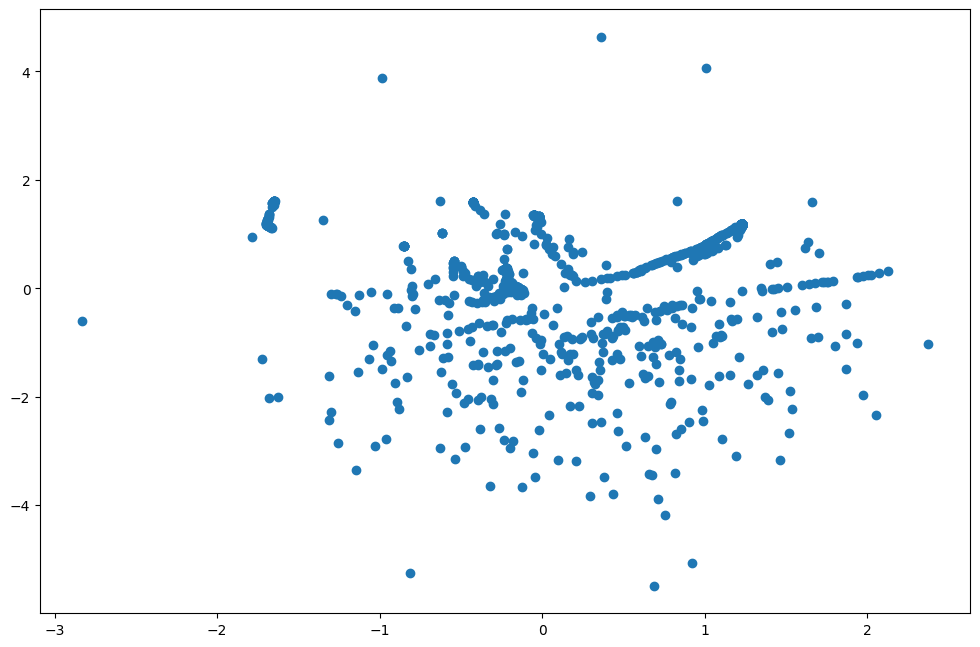

In [21]:
plt.scatter(some_data[:, 0], some_data[:, 1])
plt.show()

In [22]:
X[:3]

array([[-0.70355808, -0.66609064, -0.53268533, -0.50368917, -0.45011702,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-0.70082705, -0.66609064, -0.53268533, -0.50368917, -0.45011702,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [-0.67556804, -0.62291797,  0.18927453, -0.50368917,  0.6738031 ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ]])

In [23]:
VAE.predict(X[:3])

c:\users\hubertmazur\desktop\omnilogy\venv\lib\site-packages\tensorflow\python\keras\engine\training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


array([[-7.8617489e-01, -7.0854986e-01, -4.9066442e-01, -4.9774113e-01,
        -4.3764210e-01,  7.1197343e-01,  7.1423203e-02,  1.0583100e-01,
         2.4386257e-02,  4.3729246e-03,  2.7570426e-02,  4.7916174e-03,
         9.7612703e-01,  3.5719275e-03,  5.2714050e-03,  3.9944053e-04],
       [-7.5686312e-01, -8.1266654e-01, -5.1650494e-01, -4.9333271e-01,
        -5.2560753e-01,  9.7938102e-01,  6.6946851e-11,  1.5317326e-07,
         1.0186364e-08,  2.5066733e-04,  7.8014731e-03,  1.0849208e-02,
         1.5950475e-06,  1.0000000e+00,  1.5814567e-13,  2.7614218e-14],
       [-6.9949257e-01, -4.9796852e-01, -4.6320593e-01, -4.7896644e-01,
        -3.7559757e-01,  2.5854707e-02,  5.5146217e-03,  7.5965524e-03,
         3.1854808e-03,  9.6960771e-01,  5.3018928e-03,  2.6692152e-03,
         2.0620644e-02,  1.4342040e-02,  9.9323261e-01,  9.5117110e-05]],
      dtype=float32)

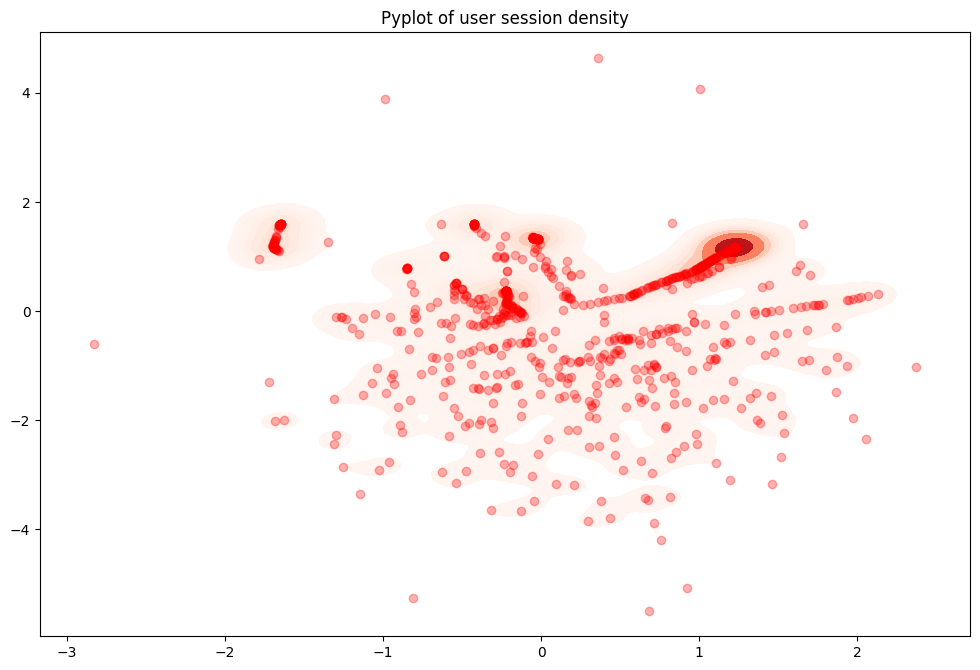

In [24]:
sns.kdeplot(x=some_data[:, 0], y=some_data[:, 1], cmap="Reds", shade=True, bw_adjust=.4)
plt.scatter(some_data[:, 0], some_data[:, 1], alpha=0.3, c='red')
plt.title('Pyplot of user session density')
plt.show()

# Add MND model to data points

In [25]:
feature_columns = ['SessionDurationTime', 'SessionEngagementTime', 'NoOfEvents', 'NoOfClicks', 'NoOfPageLoads',
                   'interval_1', 'interval_2', 'interval_3', 'interval_4']


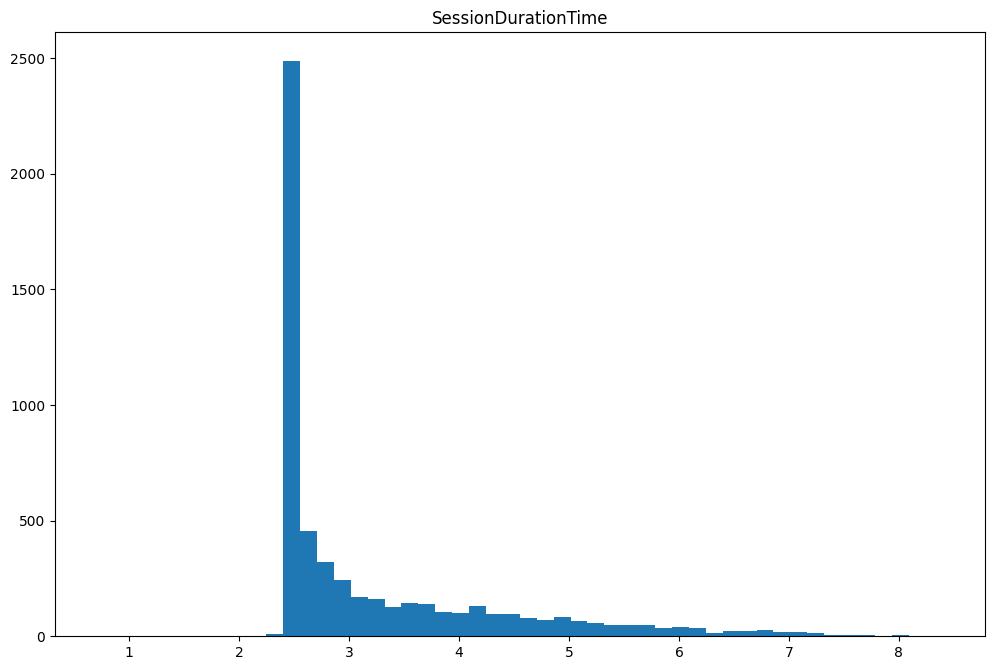

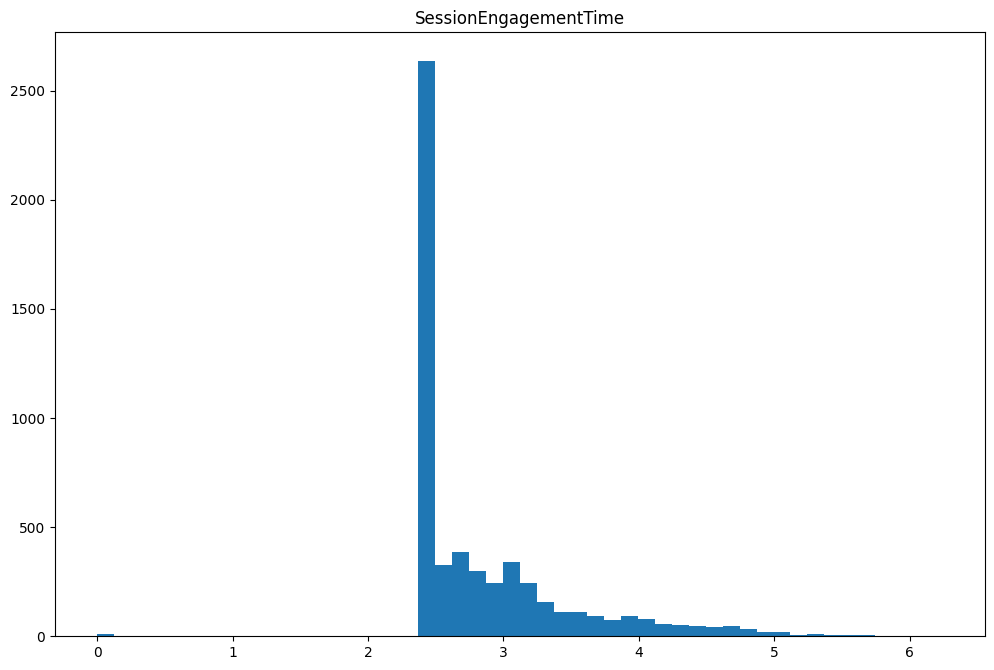

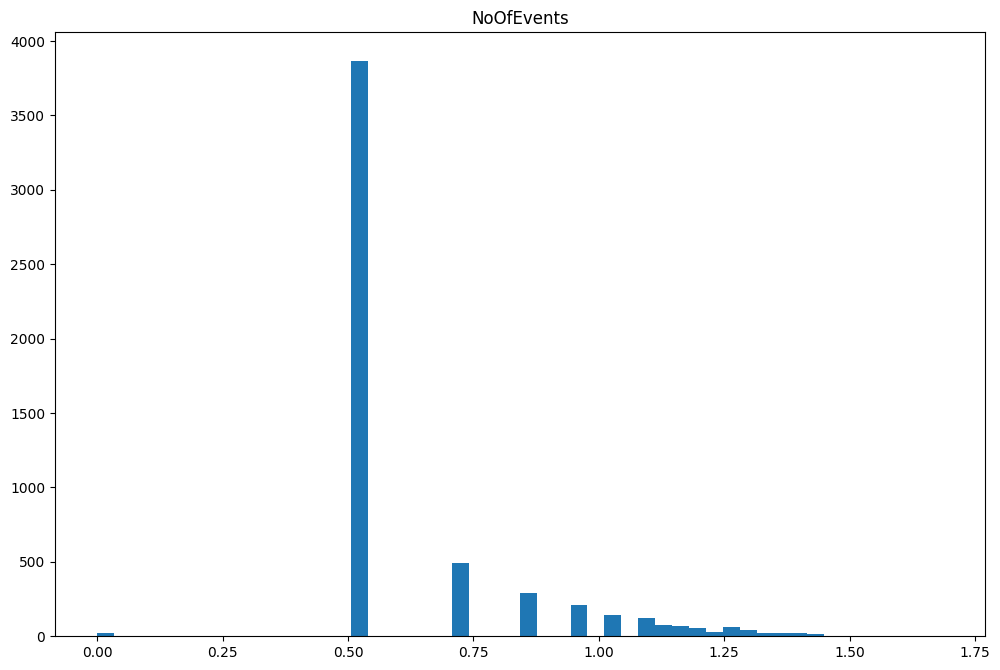

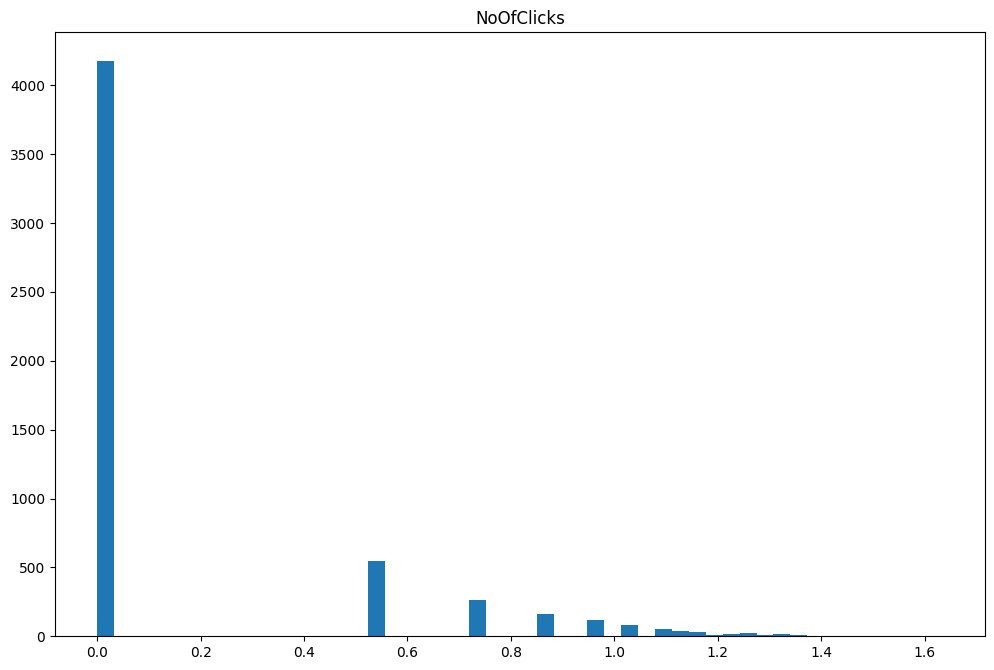

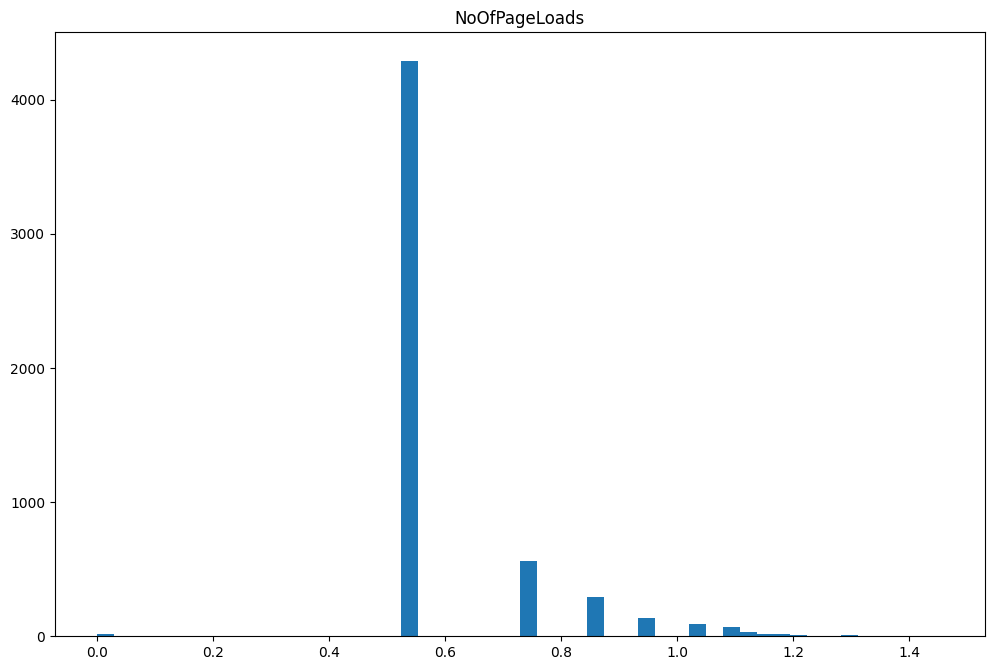

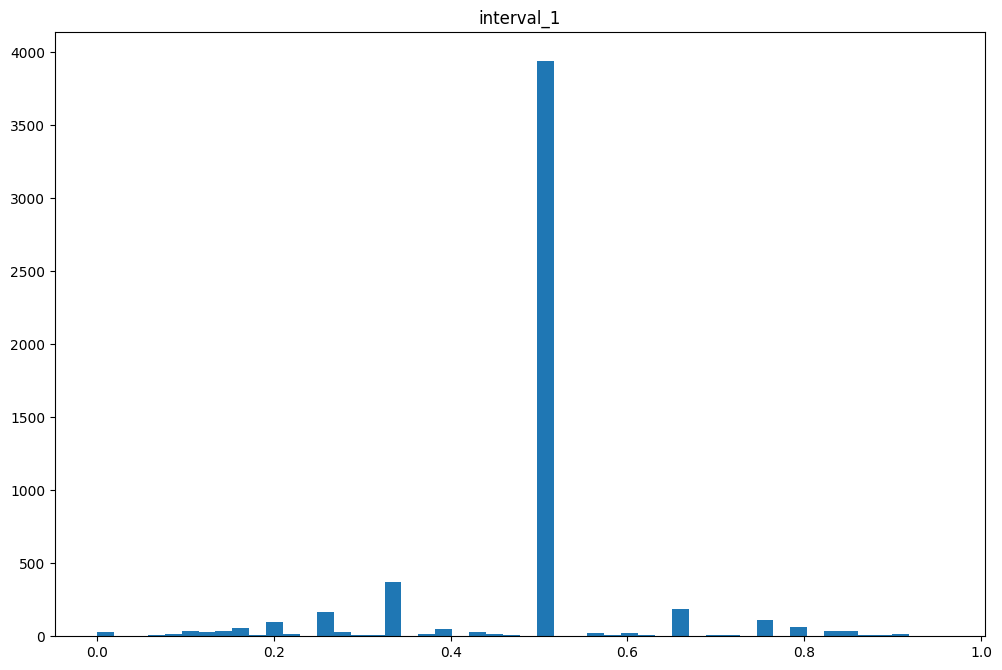

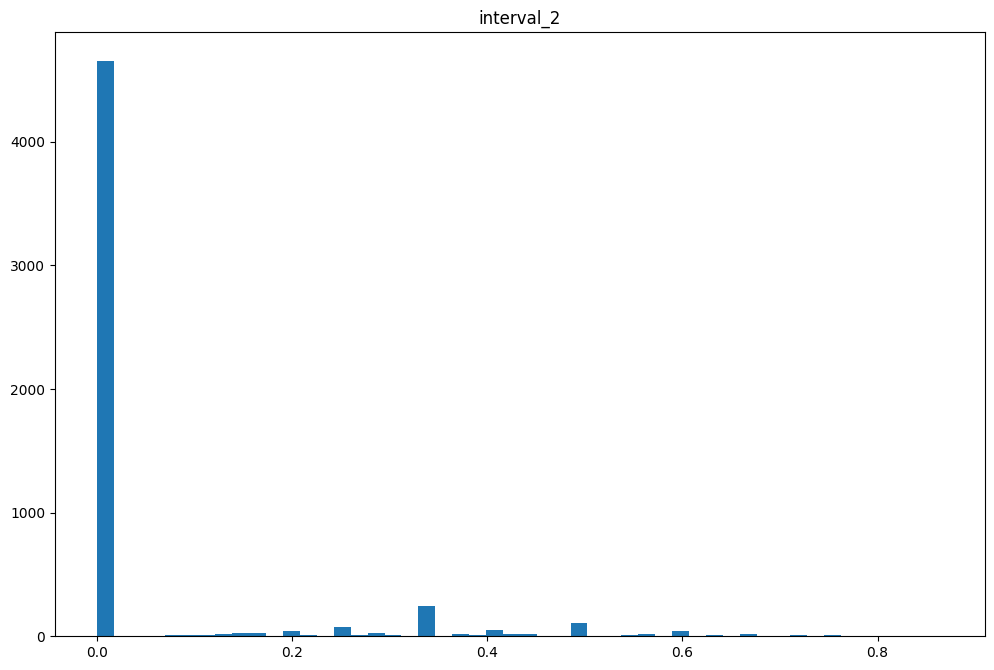

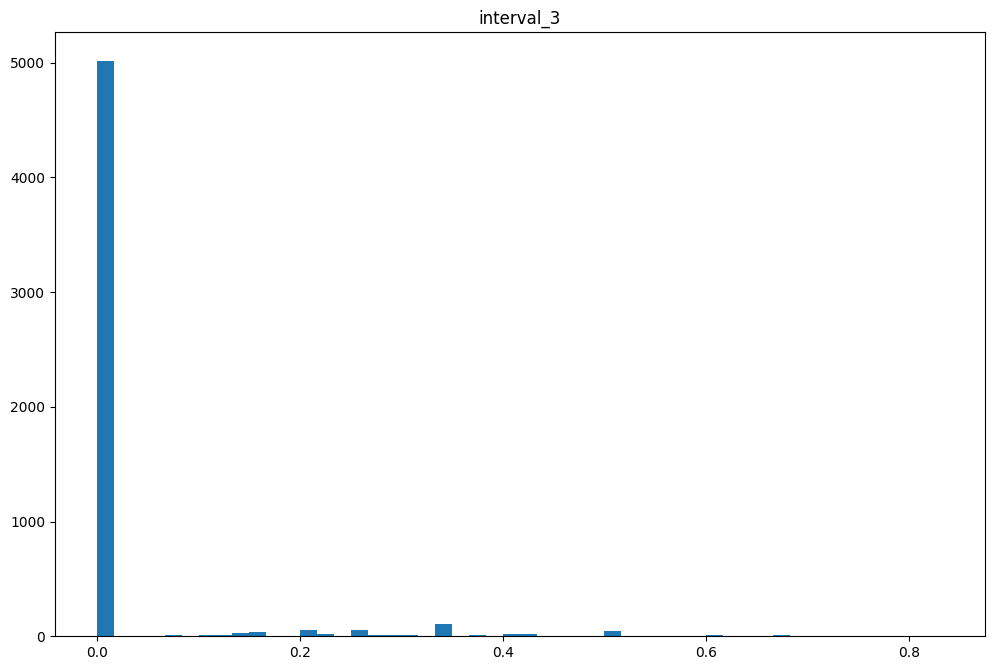

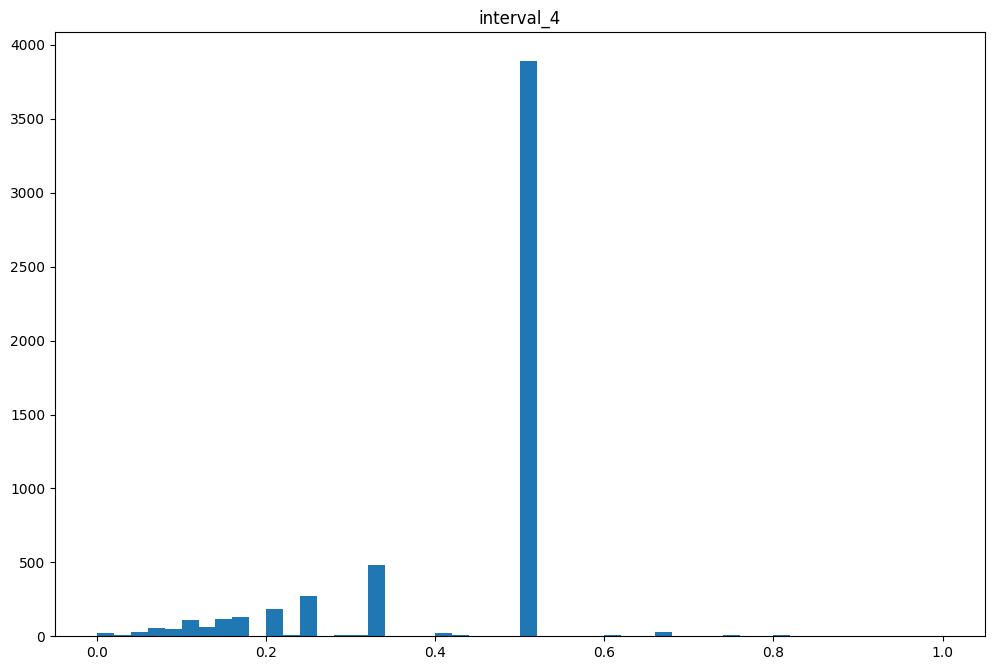

In [26]:
data = np.empty((np.sum(pd.to_numeric(df['SessionDurationTime']) > 0), 1))

for i, feature in enumerate(feature_columns):
    x = pd.to_numeric(df[feature])
    if i <= 1:
        x = np.log1p(x[pd.to_numeric(df['SessionDurationTime']) > 0])
    elif i > 1 and i < 5:
        x = np.log1p(np.log1p(x[pd.to_numeric(df['SessionDurationTime']) > 0]))
    else:
        x = x[pd.to_numeric(df['SessionDurationTime']) > 0]
    
    plt.hist(x, bins=50)
    plt.title(feature)
    plt.show()
    
    x = x[pd.to_numeric(df['SessionDurationTime']) > 0].values.reshape(-1, 1)
    
    data = np.hstack((data, x))


In [27]:
np.sum(pd.to_numeric(df['SessionDurationTime']) > 0)

5566

In [28]:
df

,SessionId,BrowswerFamily,Reffer,Country,DefaultHeight,DefaultWidth,DeviceType,SessionDurationTime,SessionEngagementTime,sesStartTimestamp,NoOfEvents,NoOfClicks,NoOfPageLoads,interval_1,interval_2,interval_3,interval_4
0,00020a70-01a8-11ec-b771-0f5dedc2814c,CHROME,https://www.solitalian.it/,Italy,720,1280,DESKTOP,10.075,10.000,1629458161454,1.0,0.0,1.0,0.500000,0.000000,0.0,0.500000
1,00051250-ce50-11eb-9f3e-355d224174c8,CHROME,https://googleads.g.doubleclick.net/,Poland,740,360,MOBILE,10.110,10.000,1623812857072,1.0,0.0,1.0,0.500000,0.000000,0.0,0.500000
2,001cf190-047e-11ec-8ad2-87937df837b9,OTHER,https://www.cargurus.com/Cars/inventorylisting...,United States,1200,340,OTHER,10.439,10.320,1629769976953,2.0,0.0,2.0,0.666667,0.000000,0.0,0.333333
3,003b40e0-042f-11ec-942e-ef735f84a5a1,OTHER,NaN,United States,600,800,OTHER,13.149,12.983,1629736046319,1.0,0.0,1.0,0.500000,0.000000,0.0,0.500000
4,004985a0-01a6-11ec-9d8e-7df8c569842b,CHROME,NaN,Turkey,915,412,MOBILE,88.574,11.028,1629457302133,2.0,1.0,1.0,0.666667,0.000000,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5574,ffd20f50-cdea-11eb-a0b4-31cc28dffcc1,CHROME,NaN,Poland,720,1280,DESKTOP,25.172,21.943,1623769476100,3.0,2.0,1.0,0.250000,0.500000,0.0,0.250000
5575,ffe81580-cff1-11eb-9228-835fda514e98,OTHER,NaN,Italy,667,375,MOBILE,12.127,12.075,1623992385641,1.0,0.0,1.0,0.500000,0.000000,0.0,0.500000
5576,ffed2120-d2bb-11eb-bc4e-5129960af9bb,CHROME,NaN,Italy,962,601,MOBILE,11.315,10.000,1624299266352,1.0,0.0,1.0,0.500000,0.000000,0.0,0.500000
5577,fffa8d20-ca40-11eb-8df4-2940124b3e6a,CHROME,https://www.google.com/,Chile,768,1366,DESKTOP,371.892,52.411,1623366608922,8.0,3.0,5.0,0.111111,0.777778,0.0,0.111111


In [29]:
data = data[:, 1:]

standard_scaler = [(np.mean(data[:, i]), np.std(data[:, i])) for i in range(data.shape[1])]

for i, (mean, std) in enumerate(standard_scaler):
    data[:, i] = (data[:, i] - mean) / std

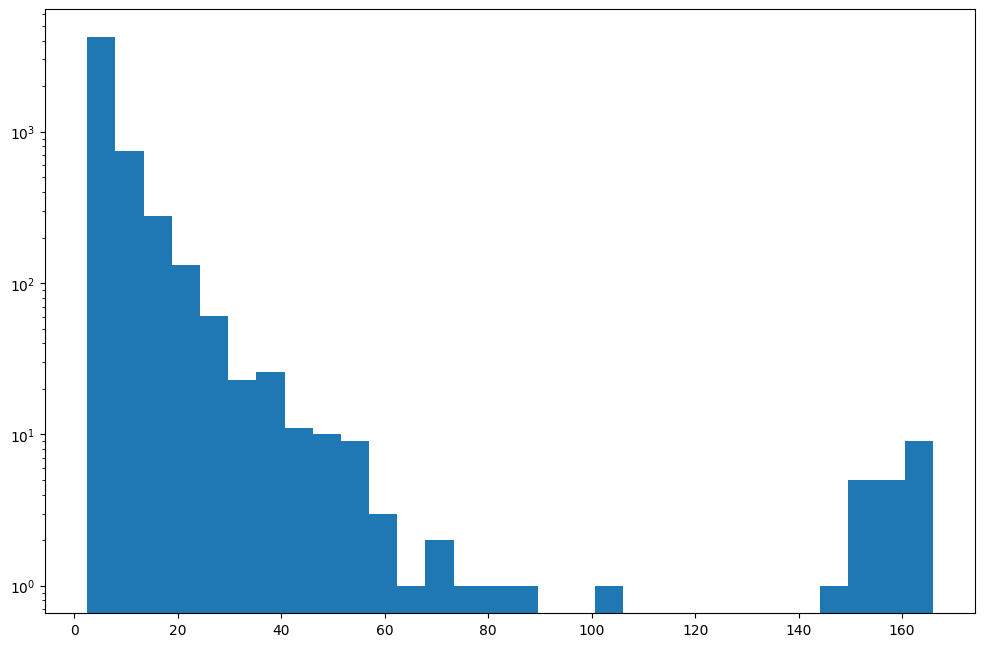

In [30]:
MNDM = MultivariateNormalDistributionModel(log_density=True)
MNDM.fit(data)
preds = MNDM.predict(data)

plt.hist(preds, bins=30)
plt.yscale('log')
plt.show()

In [31]:
preds

array([ 2.67741941,  2.67595732, 12.02545564, ...,  2.64454087,
       21.86506639,  4.31161994])

In [32]:
reconstructed_preds = VAE.predict(X)
for i in range(5):
    unstandarized_feature = reconstructed_preds[:, i]
    
    cur_feature = feature_columns[i]
    cur_data = df[cur_feature]
    mean, std = np.mean(np.log1p(cur_data)), np.std(np.log1p(cur_data))
    unstandarized_feature = np.exp(unstandarized_feature) - 1
    unstandarized_feature *= std
    unstandarized_feature += mean
    
    reconstructed_preds[:, i] = unstandarized_feature

reconstructed_preds
    

array([[2.5722885e+00, 2.5074720e+00, 7.7418005e-01, ..., 5.2002072e-03,
        3.3519864e-03, 3.6516786e-04],
       [2.5760436e+00, 2.4522381e+00, 7.6727170e-01, ..., 1.0000000e+00,
        1.8652826e-16, 3.0542618e-17],
       [2.6165948e+00, 2.5420501e+00, 7.8491342e-01, ..., 2.3448050e-02,
        9.8718464e-01, 8.4237348e-05],
       ...,
       [2.5784211e+00, 2.4571795e+00, 7.6606160e-01, ..., 1.0000000e+00,
        9.1187590e-17, 1.4487259e-17],
       [1.0787481e+01, 6.5768013e+00, 4.7627559e+00, ..., 2.1181029e-01,
        1.7057955e-03, 4.8775626e-05],
       [3.7019622e+00, 2.6148186e+00, 7.5978470e-01, ..., 3.0137002e-03,
        2.5748640e-02, 4.4316053e-04]], dtype=float32)

# Complete plot

In [33]:
n_sessions = 4000
shuffle = True

rand_indeces = np.random.choice(range(len(data)), size=n_sessions)
some_data = X[rand_indeces]

preds = MNDM.predict(data[rand_indeces])
preds = np.array(preds)
some_data = VAE_decoder(some_data)[0]

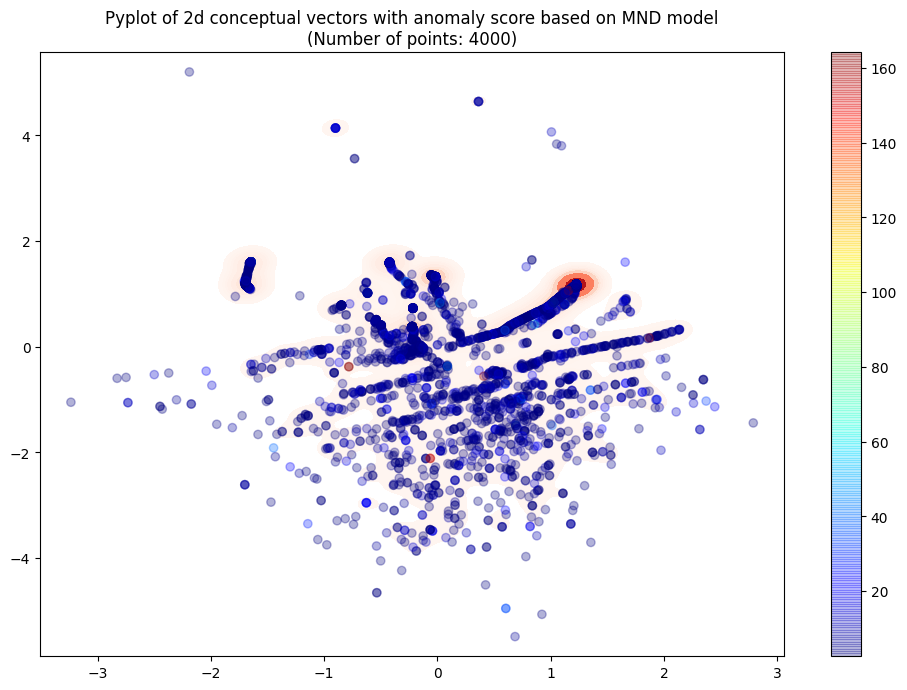

In [34]:
sns.kdeplot(x=some_data[:, 0], y=some_data[:, 1], cmap="Reds", shade=True, bw_adjust=.4)
plt.scatter(some_data[:, 0], some_data[:, 1], alpha=0.3, c=preds[:n_sessions], cmap="jet",)
plt.title(f'Pyplot of 2d conceptual vectors with anomaly score based on MND model\n(Number of points: {n_sessions})')
plt.colorbar()
plt.show()

# Node.js graph

In [35]:
raw_symbols = SymbolValidator().values
colors = ['LightSkyBlue', 'MediumPurple', 'Red', 'Green', 'Brown', 'Pink', 'Orange']
embedding = some_data
new_df = pd.DataFrame(df.iloc[rand_indeces])
new_df["anomaly_score"] = np.mean(np.abs(X[rand_indeces] - VAE.predict(X)[rand_indeces]), axis=-1)
new_df["x"] = embedding[:,0]
new_df["y"] = embedding[:,1]

fig = go.Figure()
for color_no, (name, plot_data) in enumerate(new_df.groupby('BrowswerFamily')):
    for i, (name2, plot_data2) in enumerate(plot_data.groupby('DeviceType')):
        fig.add_scatter(x=plot_data2['x'], y=plot_data2['y'], mode='markers', marker = dict(color = colors[color_no]),
                        marker_symbol=i, text = [''.join([column + ':' + str(item) + "<br>" for item, column in zip(row, new_df.columns[1:])]) for row in plot_data2.to_numpy()[:,1:-2] ])

fig.update_traces(marker=dict(size=9,
                line=dict(width=2,
                color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.write_html('first_figure.html', auto_open=True)


# Histogram of anomaly score (mean absolute error)

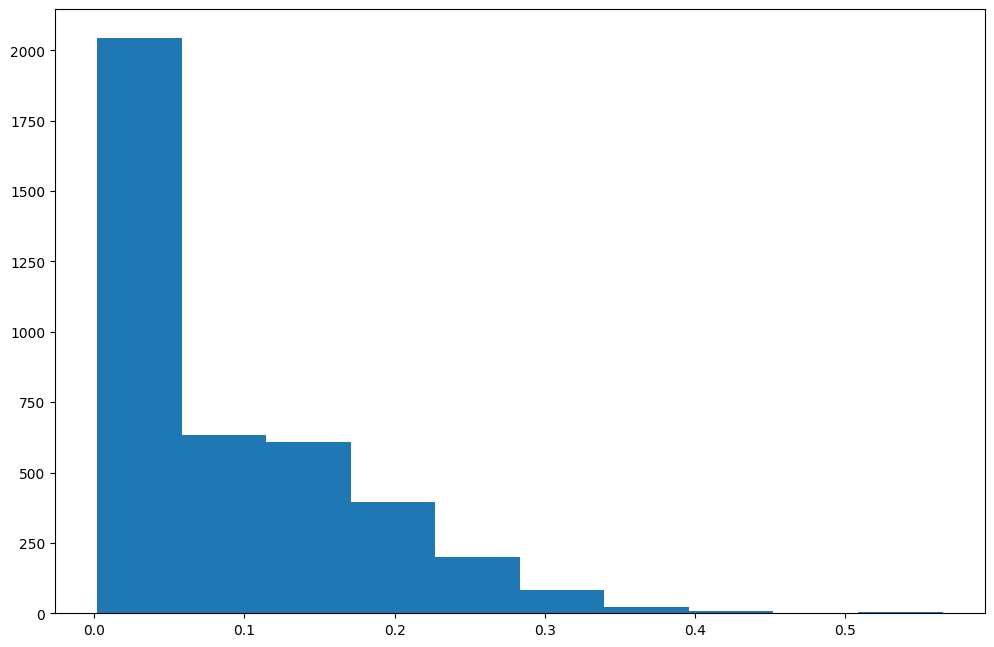

In [36]:
plt.hist(new_df['anomaly_score'])
plt.show()

# Clustering algorithms implementation

In [37]:
super_new_df = pd.read_csv('data.csv')
super_new_df

,Unnamed: 0,user_agent,id_,browser_family,country,os,user_ip,screen_h,screen_w,host,device_type,referrer,duration,timestamp,session_engagement_time,_ProcessedSession__clicks_no,_ProcessedSession__page_loads_no,_ProcessedSession__intervals,n_intervals,_ProcessedSession__events,graph,cluster
0,0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,00020a70-01a8-11ec-b771-0f5dedc2814c,CHROME,Italy,WINDOWS,79.55.53.136,720,1280,172.17.0.5,DESKTOP,https://www.solitalian.it/,10075.0,1629458161454,10000.0,0,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10,"[Event(timestamp=1629458161454, name='Page /en...",MultiDiGraph with 3 nodes and 1 edges,16
1,1,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,00025e40-c831-11eb-9adb-cf927977fc1b,EDGE,Poland,WINDOWS,79.98.144.122,1050,1680,172.17.0.6,DESKTOP,https://www.bing.com/,16275.0,1623139873986,16275.0,0,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10,"[Event(timestamp=1623139873986, name='Page /o-...",MultiDiGraph with 3 nodes and 1 edges,11
2,2,Mozilla/5.0 (Linux; Android 9; SM-G950F) Apple...,00051250-ce50-11eb-9f3e-355d224174c8,CHROME,Poland,ANDROID,83.26.157.217,740,360,172.17.0.9,MOBILE,https://googleads.g.doubleclick.net/,10110.0,1623812857072,10000.0,0,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10,"[Event(timestamp=1623812857072, name='Page /o-...",MultiDiGraph with 3 nodes and 1 edges,7
3,3,Mozilla/5.0 (Linux; Android 10; Redmi Note 9 P...,001974e0-b92c-11eb-a517-27c6c7549d7f,CHROME,Turkey,ANDROID,176.40.149.245,873,393,172.17.0.11,MOBILE,https://onedio.com/,10194.0,1621488419683,10000.0,0,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10,"[Event(timestamp=1621488419683, name='Page /en...",MultiDiGraph with 3 nodes and 1 edges,19
4,4,Mozilla/5\.0 \(Linux; Android 10; J8110 Build/...,001cf190-047e-11ec-8ad2-87937df837b9,OTHER,United States,OTHER,4.15.235.2,1200,340,172.17.0.5,OTHER,https://www.cargurus.com/Cars/inventorylisting...,10439.0,1629769976953,10320.0,0,2,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10,"[Event(timestamp=1629769976953, name='Page /es...",MultiDiGraph with 3 nodes and 1 edges,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13112,13112,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,ffe6d540-007e-11ec-9fcc-27bbdbb06c36,CHROME,Netherlands,OTHER,37.139.0.0,720,1280,172.17.0.3,DESKTOP,NaN,10062.0,1629330600255,10000.0,0,0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10,"[Event(timestamp=1629330600255, name='Dummy_ev...",MultiDiGraph with 2 nodes and 1 edges,1
13113,13113,Mozilla/5.0 (iPhone; CPU iPhone OS 14_4 like M...,ffe81580-cff1-11eb-9228-835fda514e98,OTHER,Italy,APPLE,5.91.174.55,667,375,172.17.0.9,MOBILE,NaN,12127.0,1623992385641,12075.0,0,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10,"[Event(timestamp=1623992385641, name='Page /en...",MultiDiGraph with 3 nodes and 1 edges,13
13114,13114,Mozilla/5.0 (Linux; Android 4.4.2; SM-T230) Ap...,ffed2120-d2bb-11eb-bc4e-5129960af9bb,CHROME,Italy,ANDROID,151.43.172.135,962,601,172.17.0.9,MOBILE,NaN,11315.0,1624299266352,10000.0,0,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10,"[Event(timestamp=1624299266352, name='Page /en...",MultiDiGraph with 3 nodes and 1 edges,6
13115,13115,Mozilla/5.0 (iPhone; CPU iPhone OS 10_2_1 like...,fff700a0-bbc1-11e8-8224-89a0a6950b61,SAFARI,China,APPLE,175.44.42.54,667,375,172.17.0.11,MOBILE,http://xrutd.myra.top/,10074.0,1621160546611,10000.0,0,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10,"[Event(timestamp=1621160546611, name='Page /en...",MultiDiGraph with 3 nodes and 1 edges,13


In [38]:
super_new_feature_columns = ['duration', 'session_engagement_time', '_ProcessedSession__clicks_no', '_ProcessedSession__page_loads_no',
                   'browser_family', 'device_type']

super_X = []

for i in range(len(super_new_feature_columns) - 2):
    cur_data = super_new_df[super_new_feature_columns[i]].values
    if i < 2:
        cur_data /= 1000
    
    cur_data = np.log1p(cur_data)
    mean, std = np.mean(cur_data), np.std(cur_data)
    cur_data -= mean
    cur_data /= std
    super_X.append(cur_data)

super_X = np.array(super_X).T
super_X.shape

(13117, 4)

In [39]:
X_2 = super_new_df[super_new_feature_columns[-2:]].values

for i, feature in enumerate(feature_columns[-2:]):
    OneHot = OneHotEncoder(sparse=False)
    OneHot.fit(X_2[:, i].reshape((-1, 1)))
    onehot = OneHot.transform(X_2[:, i].reshape((-1, 1)))
    
    if i == 0:
        super_append_data_1 = onehot
        names1 = OneHot.get_feature_names()
    else:
        super_append_data_2 = onehot
        names2 = OneHot.get_feature_names()

names1 = np.vectorize(lambda x: x[3:])(names1)
names2 = np.vectorize(lambda x: x[3:])(names2)

In [40]:
super_append_data_1

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [41]:
super_append_data_1.shape

(13117, 8)

In [42]:
super_append_data_2

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [43]:
super_append_data_2.shape

(13117, 4)

In [44]:
new_X = np.hstack((super_X, super_append_data_1, super_append_data_2))
new_X

array([[-0.80983675, -0.28776094, -0.56554407, ...,  0.        ,
         0.        ,  0.        ],
       [-0.44858415,  0.09673515, -0.56554407, ...,  0.        ,
         0.        ,  0.        ],
       [-0.8072728 , -0.28776094, -0.56554407, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.72359856, -0.28776094, -0.56554407, ...,  1.        ,
         0.        ,  0.        ],
       [-0.80991012, -0.28776094, -0.56554407, ...,  1.        ,
         0.        ,  0.        ],
       [ 2.04771146,  1.05826807,  1.21738461, ...,  0.        ,
         0.        ,  0.        ]])

In [45]:
n_features = new_X.shape[1]

# 2nd model creation

In [46]:
def continuous_mae(y_true, y_pred):
    mae = y_true[:, :4] - y_pred[:, :4]
    mae = np.mean(np.abs(mae), axis=-1)
    return np.mean(mae, axis=-1)

def bf_acc(y_true, y_pred):
    true_arr = y_true[:, 4:12]
    max_args = np.argmax(y_pred[:, 4:12], axis=-1)
    result = 0
    for i in range(y_true.shape[0]):
        result += int(true_arr[i][max_args[i]])
    return result / y_true.shape[0]

def dt_acc(y_true, y_pred):
    true_arr = y_true[:, 12:]
    max_args = np.argmax(y_pred[:, 12:], axis=-1)
    result = 0
    for i in range(y_true.shape[0]):
        result += int(true_arr[i][max_args[i]])
    return result / y_true.shape[0]

In [47]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.keras.backend.random_normal(shape=(2, ),
                                            mean=0., stddev=1.)
    return z_mean + tf.keras.backend.exp(z_log_var) * epsilon

In [48]:
class standardized_loss_layer(tf.keras.layers.Layer):
    
    def vae_std_loss(self, x, x_pred):
        xent_loss = tf.keras.metrics.mae(x, x_pred)
        kl_loss = -5e-4 * tf.keras.backend.mean(1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var), axis=-1)
        # return tf.keras.backend.mean(xent_loss + kl_loss) / 2
        loss = (xent_loss + kl_loss) / 2
        loss = tf.keras.backend.reshape(loss, (-1, 1))
        return loss
    
    def call(self,  inputs):
        x = inputs[0]
        z_decoded = inputs[1]
        loss = self.vae_std_loss(x, z_decoded)
        # self.add_loss(loss, inputs=inputs)
        return loss

class one_hot_loss_layer(tf.keras.layers.Layer):
    
    def vae_one_hot_loss(self, x, x_pred):
        xent_loss = tf.keras.metrics.binary_crossentropy(x, x_pred)
        kl_loss = -5e-4 * tf.keras.backend.mean(1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var), axis=-1)
        # return tf.keras.backend.mean(xent_loss + kl_loss) / 2
        loss = (xent_loss + kl_loss) / 2
        loss = tf.keras.backend.reshape(loss, (-1, 1))
        return loss

    
    def call(self,  inputs):
        x = inputs[0]
        z_decoded = inputs[1]
        loss = self.vae_one_hot_loss(x, z_decoded)
        # self.add_loss(loss, inputs=inputs)
        return loss

class sum_loss_layer(tf.keras.layers.Layer):
    
    def call(self, inputs):
        std_loss, one_hot_loss = inputs
        loss = tf.keras.backend.sum(std_loss, one_hot_loss)
        self.add_loss(loss)
        return std_loss

class total_loss_layer(tf.keras.layers.Layer):
    
    def vae_std_loss(self, x, x_pred):
        xent_loss = tf.keras.metrics.mse(x, x_pred) * 3
        kl_loss = tf.keras.backend.mean(1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var), axis=-1)
        # kl_loss = tf.keras.backend.square(kl_loss)
        kl_loss *= -5e-4 * 2
        # kl_loss /= tf.keras.backend.mean(tf.keras.backend.exp(z_log_var), axis=-1) * 3
        return tf.keras.backend.mean(xent_loss + kl_loss) / 3  # 3 last layers
    
    def vae_one_hot_loss(self, x, x_pred):
        xent_loss = tf.keras.metrics.categorical_crossentropy(x, x_pred)
        kl_loss = tf.keras.backend.mean(1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var), axis=-1)
        # kl_loss = tf.keras.backend.square(kl_loss)
        kl_loss *= -5e-4
        # kl_loss /= tf.keras.backend.mean(tf.keras.backend.exp(z_log_var), axis=-1) * 3
        return tf.keras.backend.mean(xent_loss + kl_loss) / 3  # 3 last layers
    
    def call(self, inputs):
        
        input_layer_values, last_layer_output = inputs
        
        std_input = input_layer_values[:, :n_features - (super_append_data_1.shape[1] + super_append_data_2.shape[1])]
        one_hot_input_1 = input_layer_values[:,
                                           n_features - (super_append_data_1.shape[1] + super_append_data_2.shape[1]):(n_features - super_append_data_1.shape[1])]
        one_hot_input_2 = input_layer_values[:,(n_features - super_append_data_1.shape[1]):]
        
        
        std_features = last_layer_output[:, :n_features - (super_append_data_1.shape[1] + super_append_data_2.shape[1])]
        one_hot_features_1 = last_layer_output[:,n_features - (super_append_data_1.shape[1] + super_append_data_2.shape[1]) : n_features - super_append_data_1.shape[1]]
        one_hot_features_2 = last_layer_output[:,n_features - super_append_data_1.shape[1]:]
        
        std_loss = self.vae_std_loss(std_input, std_features)
        one_hot_loss_1 = self.vae_one_hot_loss(one_hot_input_1, one_hot_features_1)
        one_hot_loss_2 = self.vae_one_hot_loss(one_hot_input_2, one_hot_features_2)                                      
        
        self.add_loss(std_loss + one_hot_loss_1 + one_hot_loss_2 )
        
        return last_layer_output
        

In [49]:
input_layer = tf.keras.Input(shape=(n_features, ))

x = tf.keras.layers.Dense(12, activation='relu')(input_layer)
x = tf.keras.layers.Dense(8, activation='relu')(x)
x = tf.keras.layers.Dense(4)(x)

z_mean = tf.keras.layers.Dense(2)(x)
z_log_var = tf.keras.layers.Dense(2)(x)

z = tf.keras.layers.Lambda(sampling)([z_mean, z_log_var])

x = tf.keras.layers.Dense(4)(z)
x = tf.keras.layers.Dense(8, activation='relu')(x)
x = tf.keras.layers.Dense(12, activation='relu')(x)

standardized_features_decoded = tf.keras.layers.Dense(n_features - (super_append_data_1.shape[1] + super_append_data_2.shape[1]))(x)
one_hot_features_decoded_1 = tf.keras.layers.Dense(n_features - (super_append_data_2.shape[1] + super_X.shape[1]),
                                                   activation='softmax')(x)
one_hot_features_decoded_2 = tf.keras.layers.Dense(n_features - (super_append_data_1.shape[1] + super_X.shape[1]),
                                                   activation='softmax')(x)

x_decoded = tf.keras.layers.Concatenate()([standardized_features_decoded, one_hot_features_decoded_1, one_hot_features_decoded_2])

loss_layer = total_loss_layer()([input_layer, x_decoded])

VAE = tf.keras.Model([input_layer], loss_layer)
VAE.compile(optimizer='rmsprop', loss=None, metrics=[continuous_mae, bf_acc, dt_acc])
VAE.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 16)]         0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 12)           204         input_2[0][0]                    
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 8)            104         dense_9[0][0]                    
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 4)            36          dense_10[0][0]                   
____________________________________________________________________________________________

In [50]:
X_train, X_test = train_test_split(new_X, test_size=0.2, random_state=420)

In [51]:
X_train.shape

(10493, 16)

In [52]:
X_test.shape

(2624, 16)

In [53]:
new_X.shape

(13117, 16)

In [54]:
n_epoch = 150
for epoch in range(1, n_epoch + 1):
    VAE.fit(X_train, y=None, shuffle=True, epochs=1, batch_size=128, validation_data=(X_test, None))
    
    if epoch % 25 == 0 or epoch==1:
        print(f'epoch {epoch} summary:')
    
        training_preds = VAE.predict(X_train)
        test_preds = VAE.predict(X_test)

        m1_train = continuous_mae(X_train, training_preds)
        m1_test = continuous_mae(X_test, test_preds)

        m2_train = bf_acc(X_train, training_preds)
        m2_test = bf_acc(X_test, test_preds)

        m3_train = dt_acc(X_train, training_preds)
        m3_test = dt_acc(X_test, test_preds)


        print(f'C_MAE_TRAINING:{round(m1_train, 2)}, C_MAE_VAL:{round(m1_test, 2)}')
        print(f'BF_ACC_TRAINING:{round(m2_train, 2)}, BF_ACC_VAL:{round(m2_test, 2)}')
        print(f'DT_ACC_TRAINING:{round(m3_train, 2)}, DT_ACC_VAL:{round(m3_test, 2)}')

Train on 10493 samples, validate on 2624 samples
10493/10493 [==============================] - 0s 44us/sample - loss: 2.0873 - val_loss: 2.0021
epoch 1 summary:


c:\users\hubertmazur\desktop\omnilogy\venv\lib\site-packages\tensorflow\python\keras\engine\training.py:2426: UserWarning:

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



C_MAE_TRAINING:0.74, C_MAE_VAL:0.74
BF_ACC_TRAINING:0.66, BF_ACC_VAL:0.66
DT_ACC_TRAINING:0.45, DT_ACC_VAL:0.44
Train on 10493 samples, validate on 2624 samples
10493/10493 [==============================] - 0s 7us/sample - loss: 1.9283 - val_loss: 1.8191
Train on 10493 samples, validate on 2624 samples
10493/10493 [==============================] - 0s 7us/sample - loss: 1.7520 - val_loss: 1.6309
Train on 10493 samples, validate on 2624 samples
10493/10493 [==============================] - 0s 7us/sample - loss: 1.5589 - val_loss: 1.4931
Train on 10493 samples, validate on 2624 samples
10493/10493 [==============================] - 0s 7us/sample - loss: 1.3629 - val_loss: 1.1963
Train on 10493 samples, validate on 2624 samples
10493/10493 [==============================] - 0s 7us/sample - loss: 1.0924 - val_loss: 1.0032
Train on 10493 samples, validate on 2624 samples
10493/10493 [==============================] - 0s 7us/sample - loss: 0.9597 - val_loss: 0.9318
Train on 10493 samples, 

10493/10493 [==============================] - 0s 7us/sample - loss: 0.3595 - val_loss: 0.3644
Train on 10493 samples, validate on 2624 samples
10493/10493 [==============================] - 0s 9us/sample - loss: 0.3573 - val_loss: 0.3664
Train on 10493 samples, validate on 2624 samples
10493/10493 [==============================] - 0s 8us/sample - loss: 0.3553 - val_loss: 0.3611
Train on 10493 samples, validate on 2624 samples
10493/10493 [==============================] - 0s 7us/sample - loss: 0.3528 - val_loss: 0.3609
Train on 10493 samples, validate on 2624 samples
10493/10493 [==============================] - 0s 7us/sample - loss: 0.3509 - val_loss: 0.3601
Train on 10493 samples, validate on 2624 samples
10493/10493 [==============================] - 0s 7us/sample - loss: 0.3486 - val_loss: 0.3567
Train on 10493 samples, validate on 2624 samples
10493/10493 [==============================] - 0s 7us/sample - loss: 0.3473 - val_loss: 0.3611
Train on 10493 samples, validate on 2624 

In [55]:
VAE_encoder = tf.keras.backend.function([VAE.layers[0].input],
                        [VAE.layers[4].output])


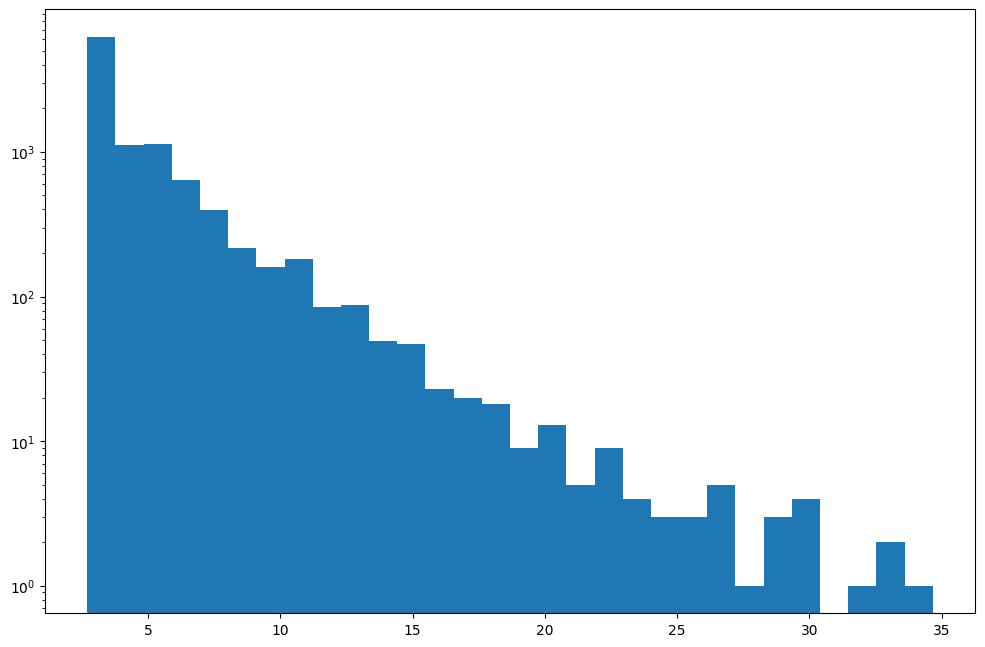

In [56]:
MNDM = MultivariateNormalDistributionModel(log_density=True)
MNDM.fit(X_train[:, :4])
preds = MNDM.predict(X_train[:, :4])
preds = np.clip(preds, 0, 1000)

plt.hist(preds, bins=30)
plt.yscale('log')
plt.show()

In [57]:
n_sessions = 6000
shuffle = True

rand_indeces = np.random.choice(range(len(new_X)), size=n_sessions)
some_data = new_X[rand_indeces]

preds = MNDM.predict(new_X[rand_indeces][:, :4])
preds = np.array(preds)
some_data = VAE_encoder(some_data)[0]

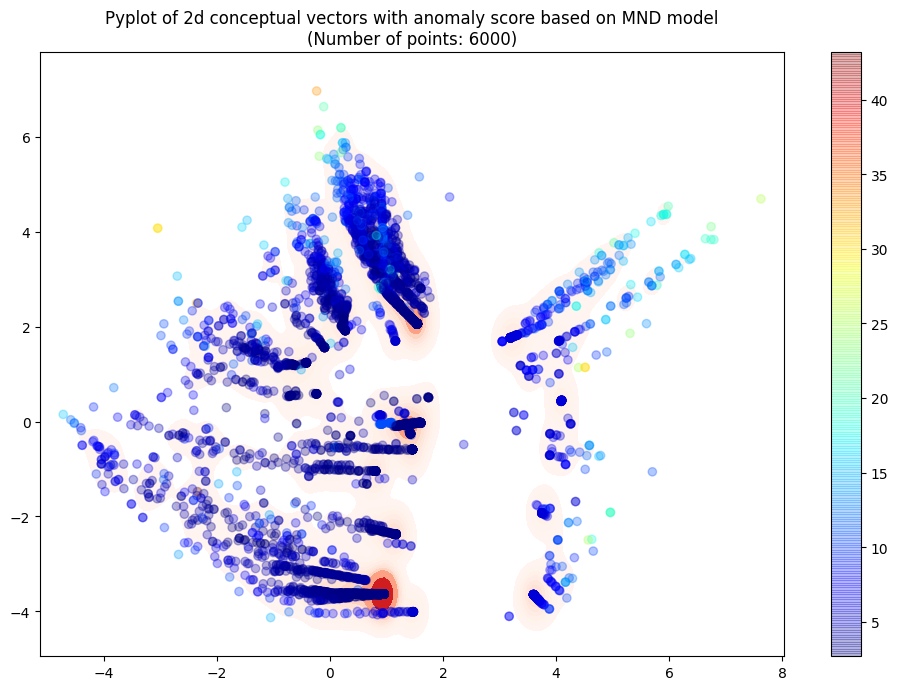

In [58]:
sns.kdeplot(x=some_data[:, 0], y=some_data[:, 1], cmap="Reds", shade=True, bw_adjust=.4)
plt.scatter(some_data[:, 0], some_data[:, 1], alpha=0.3, c=preds[:n_sessions], cmap="jet",)
plt.title(f'Pyplot of 2d conceptual vectors with anomaly score based on MND model\n(Number of points: {n_sessions})')
plt.colorbar()
plt.show()

In [59]:
raw_symbols = SymbolValidator().values
colors = ['LightSkyBlue', 'MediumPurple', 'Red', 'Green', 'Brown', 'Pink', 'Orange', 'Yellow']
embedding = some_data
new_df = pd.DataFrame(super_new_df.iloc[rand_indeces])
new_df["anomaly_score"] = np.mean(np.abs(new_X[rand_indeces] - VAE.predict(new_X)[rand_indeces]), axis=-1)
new_df["x"] = embedding[:,0]
new_df["y"] = embedding[:,1]

fig = go.Figure()
for color_no, (name, plot_data) in enumerate(new_df.groupby('browser_family')):
    for i, (name2, plot_data2) in enumerate(plot_data.groupby('device_type')):
        fig.add_scatter(x=plot_data2['x'], y=plot_data2['y'], mode='markers',
                        marker = dict(color = colors[color_no]),
                        marker_symbol=i, text = [''.join([column + ':' + str(item) + "<br>" for item, column in zip(row, new_df.columns[1:])]) for row in plot_data2.to_numpy()[:,1:-6] ])

fig.update_traces(marker=dict(size=9,
                line=dict(width=2,
                color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.write_html('normal_categorical_error.html', auto_open=True)


In [60]:
super_new_df

,Unnamed: 0,user_agent,id_,browser_family,country,os,user_ip,screen_h,screen_w,host,device_type,referrer,duration,timestamp,session_engagement_time,_ProcessedSession__clicks_no,_ProcessedSession__page_loads_no,_ProcessedSession__intervals,n_intervals,_ProcessedSession__events,graph,cluster
0,0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,00020a70-01a8-11ec-b771-0f5dedc2814c,CHROME,Italy,WINDOWS,79.55.53.136,720,1280,172.17.0.5,DESKTOP,https://www.solitalian.it/,10.075,1629458161454,10.000,0,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10,"[Event(timestamp=1629458161454, name='Page /en...",MultiDiGraph with 3 nodes and 1 edges,16
1,1,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,00025e40-c831-11eb-9adb-cf927977fc1b,EDGE,Poland,WINDOWS,79.98.144.122,1050,1680,172.17.0.6,DESKTOP,https://www.bing.com/,16.275,1623139873986,16.275,0,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10,"[Event(timestamp=1623139873986, name='Page /o-...",MultiDiGraph with 3 nodes and 1 edges,11
2,2,Mozilla/5.0 (Linux; Android 9; SM-G950F) Apple...,00051250-ce50-11eb-9f3e-355d224174c8,CHROME,Poland,ANDROID,83.26.157.217,740,360,172.17.0.9,MOBILE,https://googleads.g.doubleclick.net/,10.110,1623812857072,10.000,0,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10,"[Event(timestamp=1623812857072, name='Page /o-...",MultiDiGraph with 3 nodes and 1 edges,7
3,3,Mozilla/5.0 (Linux; Android 10; Redmi Note 9 P...,001974e0-b92c-11eb-a517-27c6c7549d7f,CHROME,Turkey,ANDROID,176.40.149.245,873,393,172.17.0.11,MOBILE,https://onedio.com/,10.194,1621488419683,10.000,0,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10,"[Event(timestamp=1621488419683, name='Page /en...",MultiDiGraph with 3 nodes and 1 edges,19
4,4,Mozilla/5\.0 \(Linux; Android 10; J8110 Build/...,001cf190-047e-11ec-8ad2-87937df837b9,OTHER,United States,OTHER,4.15.235.2,1200,340,172.17.0.5,OTHER,https://www.cargurus.com/Cars/inventorylisting...,10.439,1629769976953,10.320,0,2,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10,"[Event(timestamp=1629769976953, name='Page /es...",MultiDiGraph with 3 nodes and 1 edges,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13112,13112,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,ffe6d540-007e-11ec-9fcc-27bbdbb06c36,CHROME,Netherlands,OTHER,37.139.0.0,720,1280,172.17.0.3,DESKTOP,NaN,10.062,1629330600255,10.000,0,0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10,"[Event(timestamp=1629330600255, name='Dummy_ev...",MultiDiGraph with 2 nodes and 1 edges,1
13113,13113,Mozilla/5.0 (iPhone; CPU iPhone OS 14_4 like M...,ffe81580-cff1-11eb-9228-835fda514e98,OTHER,Italy,APPLE,5.91.174.55,667,375,172.17.0.9,MOBILE,NaN,12.127,1623992385641,12.075,0,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10,"[Event(timestamp=1623992385641, name='Page /en...",MultiDiGraph with 3 nodes and 1 edges,13
13114,13114,Mozilla/5.0 (Linux; Android 4.4.2; SM-T230) Ap...,ffed2120-d2bb-11eb-bc4e-5129960af9bb,CHROME,Italy,ANDROID,151.43.172.135,962,601,172.17.0.9,MOBILE,NaN,11.315,1624299266352,10.000,0,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10,"[Event(timestamp=1624299266352, name='Page /en...",MultiDiGraph with 3 nodes and 1 edges,6
13115,13115,Mozilla/5.0 (iPhone; CPU iPhone OS 10_2_1 like...,fff700a0-bbc1-11e8-8224-89a0a6950b61,SAFARI,China,APPLE,175.44.42.54,667,375,172.17.0.11,MOBILE,http://xrutd.myra.top/,10.074,1621160546611,10.000,0,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10,"[Event(timestamp=1621160546611, name='Page /en...",MultiDiGraph with 3 nodes and 1 edges,13


In [61]:

s='''aliceblue, antiquewhite, aqua, aquamarine, azure,
        beige, bisque, black, blanchedalmond, blue,
        blueviolet, brown, burlywood, cadetblue,
        chartreuse, chocolate, coral, cornflowerblue,
        cornsilk, crimson, cyan, darkblue, darkcyan,
        darkgoldenrod, darkgray, darkgrey, darkgreen,
        darkkhaki, darkmagenta, darkolivegreen, darkorange,
        darkorchid, darkred, darksalmon, darkseagreen,
        darkslateblue, darkslategray, darkslategrey,
        darkturquoise, darkviolet, deeppink, deepskyblue,
        dimgray, dimgrey, dodgerblue, firebrick,
        floralwhite, forestgreen, fuchsia, gainsboro,
        ghostwhite, gold, goldenrod, gray, grey, green,
        greenyellow, honeydew, hotpink, indianred, indigo,
        ivory, khaki, lavender, lavenderblush, lawngreen,
        lemonchiffon, lightblue, lightcoral, lightcyan,
        lightgoldenrodyellow, lightgray, lightgrey,
        lightgreen, lightpink, lightsalmon, lightseagreen,
        lightskyblue, lightslategray, lightslategrey,
        lightsteelblue, lightyellow, lime, limegreen,
        linen, magenta, maroon, mediumaquamarine,
        mediumblue, mediumorchid, mediumpurple,
        mediumseagreen, mediumslateblue, mediumspringgreen,
        mediumturquoise, mediumvioletred, midnightblue,
        mintcream, mistyrose, moccasin, navajowhite, navy,
        oldlace, olive, olivedrab, orange, orangered,
        orchid, palegoldenrod, palegreen, paleturquoise,
        palevioletred, papayawhip, peachpuff, peru, pink,
        plum, powderblue, purple, red, rosybrown,
        royalblue, saddlebrown, salmon, sandybrown,
        seagreen, seashell, sienna, silver, skyblue,
        slateblue, slategray, slategrey, snow, springgreen,
        steelblue, tan, teal, thistle, tomato, turquoise,
        violet, wheat, white, whitesmoke, yellow,
        yellowgreen
        '''
li=s.split(',')
li=[l.replace('\n','') for l in li]
li=[l.replace(' ','') for l in li]


fig = go.Figure()
for color_no, (name, plot_data) in enumerate(new_df.groupby('cluster')):
        fig.add_scatter(x=plot_data['x'], y=plot_data['y'], mode='markers',
                        marker = dict(color = li[color_no]),
                        text = [''.join([column + ':' + str(item) + "<br>" for item, column in zip(row, new_df.columns[1:])]) for row in plot_data.to_numpy()[:,1:-6] ])

fig.update_traces(marker=dict(size=9,
                line=dict(width=2,
                color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.write_html('first_figure2.html', auto_open=True)

# Metryka dobroci modelu

In [62]:

VAE_log_var = tf.keras.backend.function([VAE.layers[0].input],
                        [VAE.layers[5].output])

log_vars = VAE_log_var(new_X)[0]

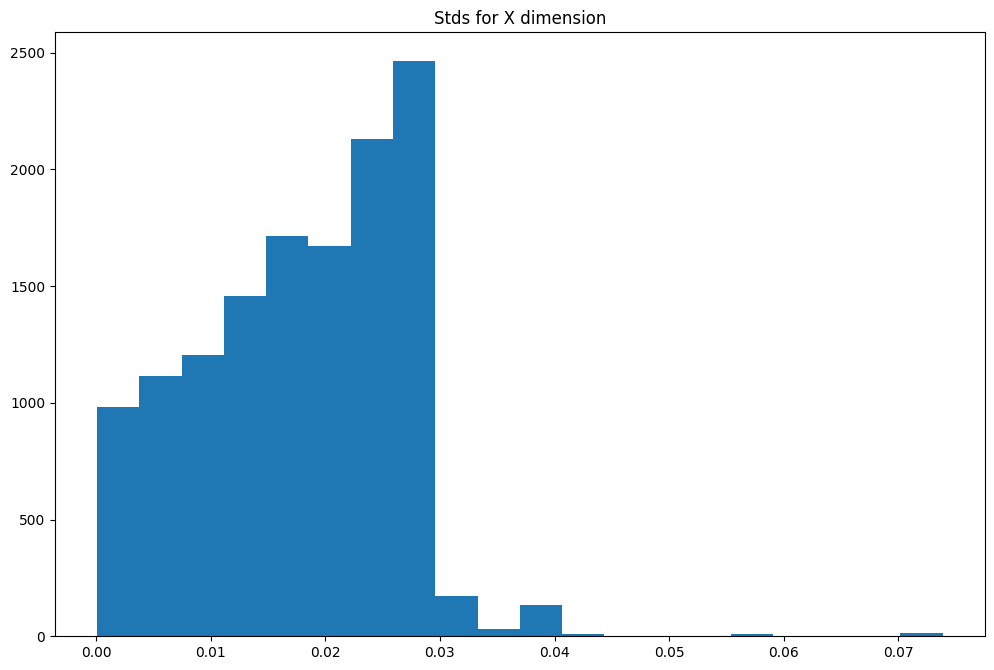

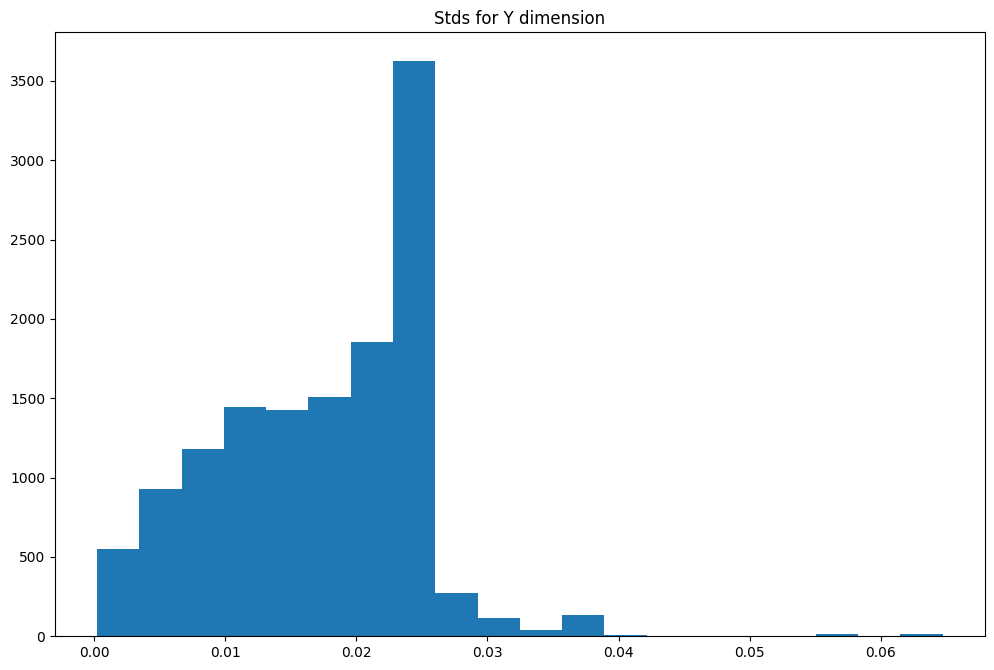

In [63]:
plt.hist(np.exp(log_vars[:, 0]), bins=20)
plt.title("Stds for X dimension")
plt.show()
plt.hist(np.exp(log_vars[:, 1]), bins=20)
plt.title("Stds for Y dimension")
plt.show()

In [64]:
print(np.mean(np.exp(log_vars[:, 0])))
print(np.mean(np.exp(log_vars[:, 1])))

0.017559206
0.017369669
